# 2017-fordgobike-tripdata
## by Sonika Bidyasar

## Preliminary Wrangling

> Dataset description:
    This is a dataset for fordgobike-tripdata from june 2017 to december 2017.
    Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. We have customers and subscribers in the data set showing trends on the usage of bike differntly.
This project is an exploratory analysis on data provided by Ford GoBike, a bike-share system provider.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from math import *
%matplotlib inline

In [2]:
df=pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(519700, 13)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object
   duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   
5          9226  2017-12-31 22:51:00.9180  2018-01-01 01:24:47.1660   
6          4507  2017

In [5]:
df.duplicated().sum()

0

In [6]:
# Columns in df:

# start_station_latitude

# start_station_longitude

# end_station_latitude

# end_station_longitude

# approximate radius of earth in km

R = 6373.0

# Here I create a temporary dataframe called temp to avoid polluting df.

temp = pd.DataFrame()

temp['lat1'] = np.radians(df['start_station_latitude'])

temp['lon1'] = np.radians(df['start_station_longitude'])

temp['lat2'] = np.radians(df['end_station_latitude'])

temp['lon2'] = np.radians(df['end_station_longitude'])

temp['dlat'] = temp['lat2'] - temp['lat1']

temp['dlon'] = temp['lon2'] - temp['lon1']

# Distance Calculation

temp['a'] = np.sin(temp['dlat'] / 2)**2 + np.cos(temp['lat1']) * np.cos(temp['lat2']) * np.sin(temp['dlon'] / 2)**2

temp['c'] = 2 * np.arctan2(np.sqrt(temp['a']), np.sqrt(1 - temp['a']))

temp['distance'] = R * temp['c']

# Copy the result from temp to df and delete temp.

df['distance'] = temp['distance']

del temp

In [7]:
df['duration_hr']=df['duration_sec']/3600

#Speed in km/hr

df['speed']=df['distance']/df['duration_hr']

#DataCleaning

In [8]:
df_clean=df.copy()

In [9]:
# set dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [10]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')


In [11]:
# extract start time month name
df_clean['start_time_month']=df_clean['start_time'].dt.strftime('%B')

In [12]:
# extract start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [13]:
# extract start time day
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)

In [14]:
# extract start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

In [15]:
df_clean['duration_min']=df_clean['duration_sec']/60

In [16]:
#Rider type, speed<10 Biginner,speed>10 but <=20- Intermediate, Speed >20- Expert

df_clean.loc[df_clean['speed']<15, 'rider_type'] = 'Intermediate'
df_clean.loc[df_clean['speed']>=15, 'rider_type'] = 'Expert'
df_clean.loc[df_clean['speed']<=5, 'rider_type'] = 'Beginner'

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [18]:
df_clean.sample(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,distance,duration_hr,speed,start_time_month,start_time_weekday,start_time_day,start_time_hour,duration_min,rider_type
76978,477,2017-12-04 10:02:25.139,2017-12-04 10:10:23.077,90,Townsend St at 7th St,37.771058,-122.402717,48,2nd St at S Park St,37.782411,...,Subscriber,1.539265,0.132500,11.617093,December,Mon,4,10,7.950000,Intermediate
316540,1169,2017-09-23 14:45:50.498,2017-09-23 15:05:19.631,39,Scott St at Golden Gate Ave,37.778999,-122.436861,116,Mississippi St at 17th St,37.764802,...,Subscriber,4.023454,0.324722,12.390449,September,Sat,23,14,19.483333,Intermediate
252685,2247,2017-10-11 17:35:19.941,2017-10-11 18:12:47.319,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,70,Central Ave at Fell St,37.773311,...,Subscriber,4.027742,0.624167,6.452992,October,Wed,11,17,37.450000,Intermediate
148507,979,2017-11-10 06:23:10.943,2017-11-10 06:39:30.307,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,61,Howard St at 8th St,37.776513,...,Subscriber,2.582670,0.271944,9.497049,November,Fri,10,6,16.316667,Intermediate


In [19]:
# save cleaned data 
df_clean.to_csv('clean_fordgoBike_Tripdata.csv', index=False)

In [20]:
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

### What is the structure of your dataset?

> The data set has 519700 records of bike trips with 13 columns.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out the the most frequent time for which the bike is rented. Frequencies of riders during different months of the year, days of the week and hours of the day.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The latitude and longitude feature allows me to calculate distance, which helps me find the speed of the riders using the time duration.

I have classified Rider types based on their speeds.

    1.Beginner, when speed <=5 km/hr

    2.Intermediate, when speed >5 km/hr and <=15 km/hr

    3.Expert, when speed >15 km/hr

## Univariate Exploration

> 

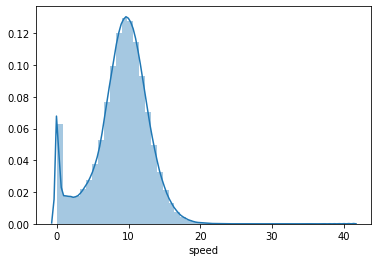

In [21]:
#Speedtrend
sb.distplot(df_clean['speed']);

The above speed strend shows that most rides ride at around speed of 10 km/hr

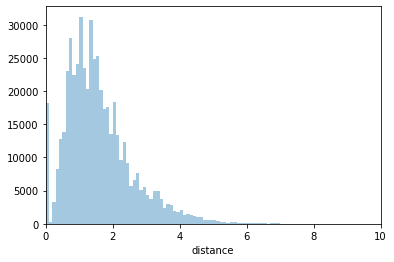

In [22]:
bins=np.arange(0,df_clean['distance'].max(),0.10)
sb.distplot(df_clean['distance'],bins=bins,kde=False);
plt.xlim([0,10]);

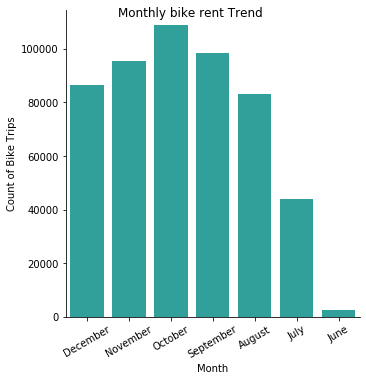

In [23]:

# monthly usege of the bike sharing system

g = sb.catplot(data=df_clean, x='start_time_month', kind='count', color = 'lightseagreen')
g.set_axis_labels("Month", "Count of Bike Trips")
g.fig.suptitle('Monthly bike rent Trend');
plt.xticks(rotation=30);


The Monthly bike rent trend shows that October has the highest number of rides

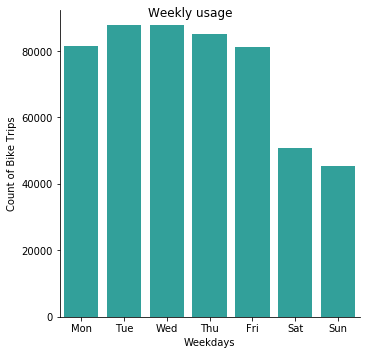

In [24]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df_clean, x='start_time_weekday', kind='count', color = 'lightseagreen', order = weekday)
g.set_axis_labels("Weekdays", "Count of Bike Trips")
g.fig.suptitle('Weekly usage' );

The Weekly usage trend shows that weekdays have more number of riders than weekends

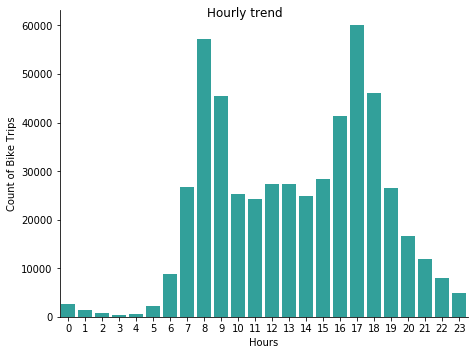

In [25]:
# hourly trend

g = sb.catplot(data=df_clean, x='start_time_hour', kind='count', color = 'lightseagreen',aspect=1.3)
g.set_axis_labels("Hours", "Count of Bike Trips")
g.fig.suptitle('Hourly trend', fontsize=12);

In [26]:

trip_by_hour_df = df_clean.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()

In [27]:
trip_by_hour_df['bike_id'] = (trip_by_hour_df['bike_id']/trip_by_hour_df['bike_id'].sum())*100

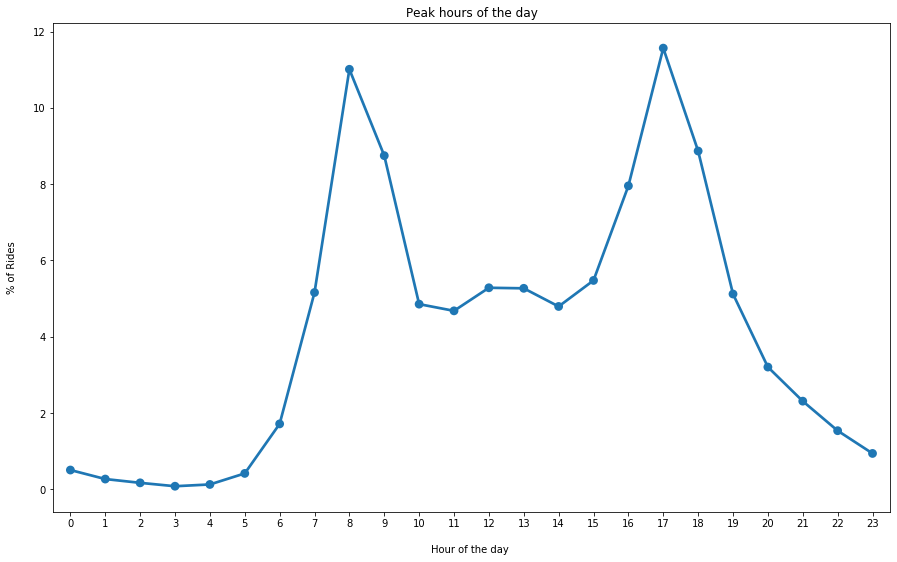

In [28]:

plt.figure(figsize=(15,9))
sb.pointplot(x='start_time_hour', y='bike_id', data=trip_by_hour_df)
plt.title('Peak hours of the day')
plt.xlabel('Hour of the day ', labelpad=16)
plt.ylabel('% of Rides', labelpad=16);


The daily trend show that the peak hours of bike rental is around 8AM-9AM and 5PM-6PM

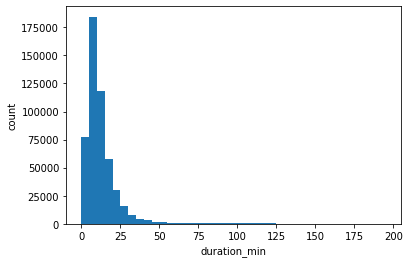

In [29]:
bins=np.arange(0,200,5)
plt.hist(data=df_clean,x='duration_min',bins=bins)
plt.ylabel('count')
plt.xlabel('duration_min');

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

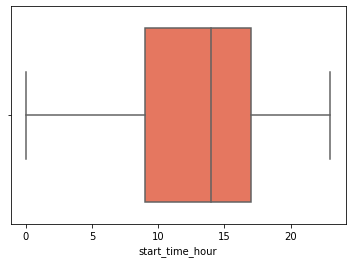

In [30]:
sb.boxplot(x='start_time_hour', data=df_clean, palette='Reds', orient='h');

### Bivariate Exploration

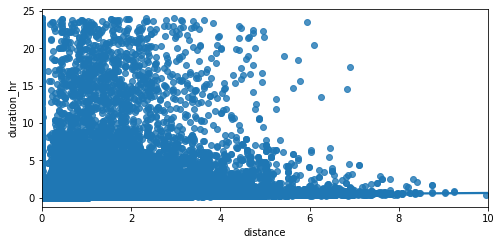

In [31]:

plt.figure(figsize = [8, 8])

plt.subplot(1,1,1)
sb.regplot(data=df_clean,x='distance',y='duration_hr',fit_reg=True);

ax = plt.subplot(2, 1, 1)
sb.regplot(data=df_clean,x='distance',y='duration_hr',fit_reg=True);
plt.xlim([0,10]);

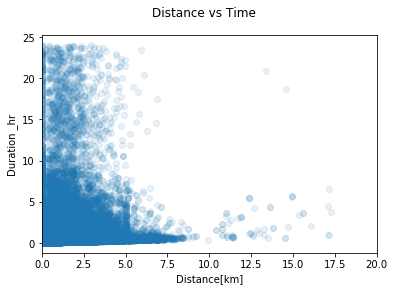

In [32]:

plt.scatter(data=df_clean,x='distance',y='duration_hr',alpha=1/10);
plt.xlim([0,20])
plt.ylabel('Duration _hr')
plt.xlabel('Distance[km]')
plt.suptitle('Distance vs Time');

In [33]:
user_type=df_clean.user_type.value_counts()
user_type

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

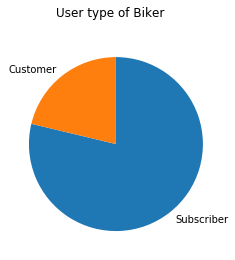

In [34]:
plt.pie(user_type,startangle=90,labels=user_type.index,counterclock=False)
plt.suptitle('User type of Biker');

The bike rental system is most used by subscibers than customers.

Intermediate    429792
Beginner         71335
Expert           18573
Name: rider_type, dtype: int64

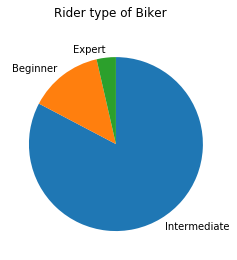

In [35]:
rider_type=df_clean['rider_type'].value_counts()
plt.pie(rider_type,startangle=90,labels=rider_type.index,counterclock=False)
plt.suptitle('Rider type of Biker');
rider_type

The bike rental system has more Intermediate speed rider types

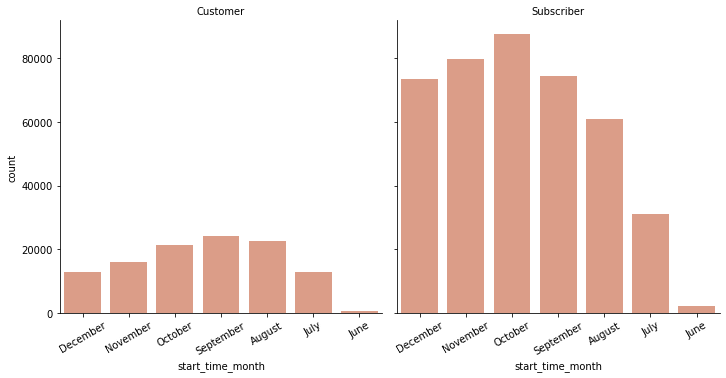

In [36]:
g = sb.catplot(data=df_clean, x='start_time_month', col="user_type", kind='count', color = 'darksalmon')

g.set_titles("{col_name}")
g.set_xticklabels(rotation=30);

The customer trend has highest rides in september, but the subscribers hav the most rides in October followed by November

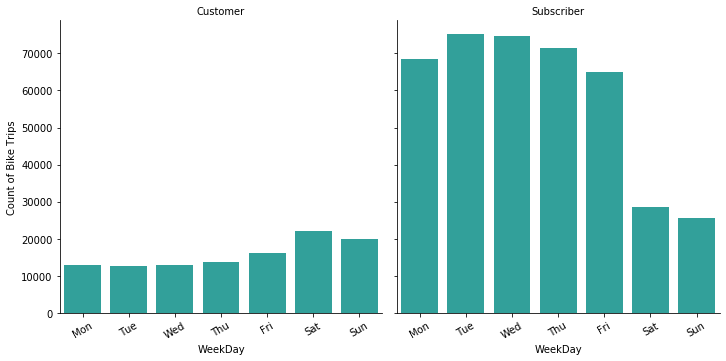

In [37]:
g = sb.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', color = 'lightseagreen', order = weekday)
g.set_axis_labels("WeekDay", "Count of Bike Trips")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=30);

The customer trend has highest rides during weekends, but the subscribers have the most rides during weekdays

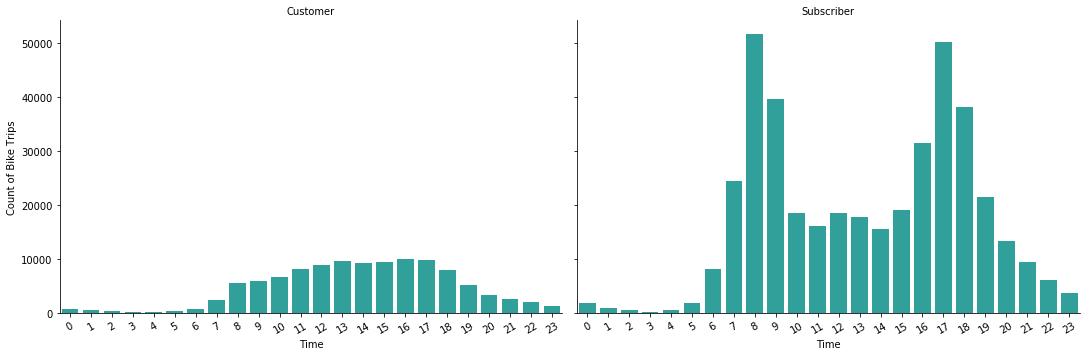

In [38]:
g = sb.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', color = 'lightseagreen',aspect=1.5)
g.set_axis_labels("Time", "Count of Bike Trips")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=30);

Customers have their rentals mostly during afternoons where as subscribers have maximum rides during morning and evenings

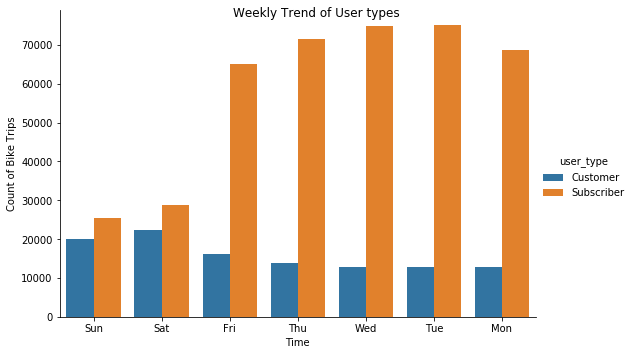

In [39]:
g = sb.catplot(data=df_clean, x='start_time_weekday', hue="user_type", kind='count', aspect=1.5)
g.set_axis_labels("Time", "Count of Bike Trips")
g.set_titles("{col_name}");
plt.suptitle('Weekly Trend of User types');

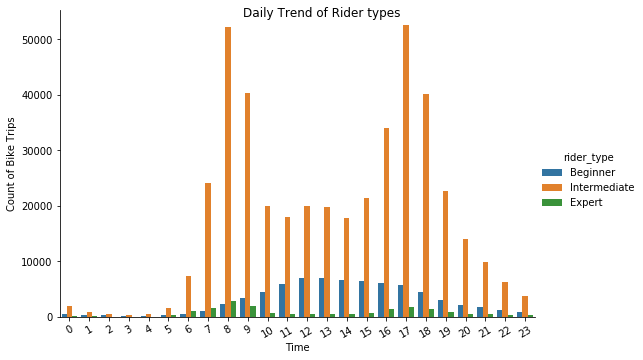

In [40]:
g = sb.catplot(data=df_clean, x='start_time_hour', hue="rider_type", kind='count', aspect=1.5)
g.set_axis_labels("Time", "Count of Bike Trips")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=30)
plt.suptitle('Daily Trend of Rider types');

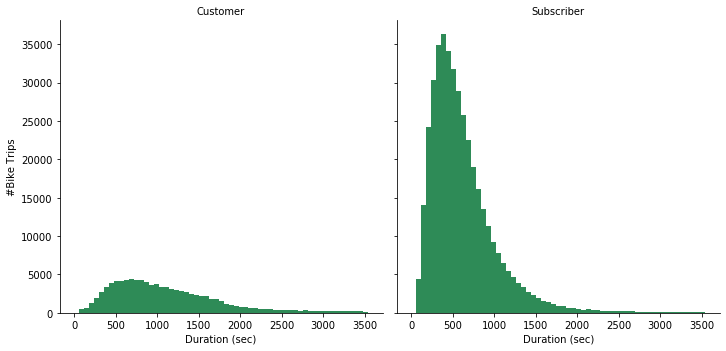

In [41]:

# code for the (histogram) duration (sec) distribution per user type

g = sb.FacetGrid(df_clean, col="user_type", margin_titles=True, height=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color='SeaGreen', bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}');


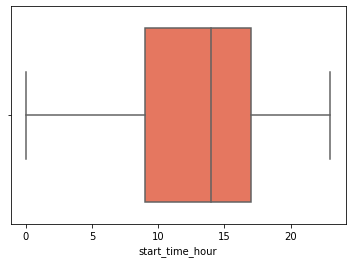

In [42]:
sb.boxplot(x='start_time_hour' ,data=df_clean, palette='Reds', orient='h');

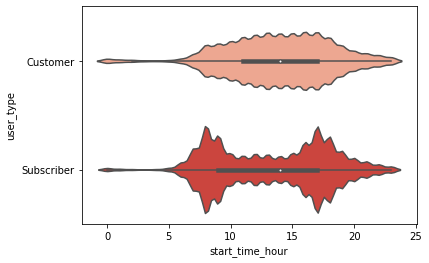

In [43]:
sb.violinplot(x='start_time_hour',y='user_type' ,data=df_clean, palette='Reds', orient='h');

Customers have their rentals trend more consistent during afternoons where as subscribers have high number of rides during morning and evenings

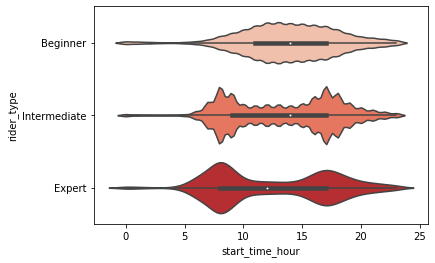

In [44]:
sb.violinplot(x='start_time_hour',y='rider_type' ,data=df_clean, palette='Reds', orient='h');

### Observations

>The Monthly bike rent trend shows that October has the highest number of rides

>The customer trend has highest rides in september, but the subscribers hav the most rides in October followed by November

>The customer trend has highest rides during weekends, but the subscribers have the most rides during weekdays

>The customer trend has highest rides during weekends, but the subscribers have the most rides during weekdays

### interesting relationships

>Experts tend to rent bikes at early morning and late nights

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [45]:
df_clean['rider_type'].value_counts()


Intermediate    429792
Beginner         71335
Expert           18573
Name: rider_type, dtype: int64

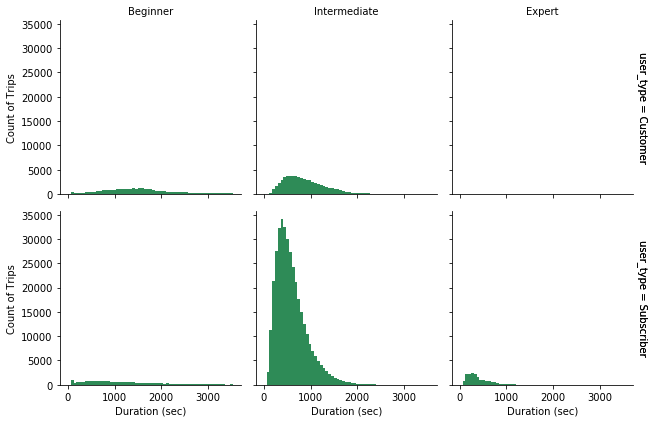

In [46]:


g = sb.FacetGrid(df_clean, col="rider_type",row='user_type', margin_titles=True)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color='SeaGreen',bins=bin_edges)
g.set_axis_labels("Duration (sec)", "Count of Trips")
g.set_titles(col_template = '{col_name}');


####  surprising interactions between features
Riders with speed < 5 km/hr who are classified as beginners also have the rides of the longest durations, proving that not speed is not the only factor deciding the type of rider. Consistent speed riders have longer duration rides.

### Conclusions:
 Subscribers are more regular in bike riding than customers and have the below trends
 
The Monthly bike rent trend shows that October has the highest number of rides

The customer trend has highest rides in september, but the subscribers hav the most rides in October followed by November

The customer trend has highest rides during weekends, but the subscribers have the most rides during weekdays

The customer trend has highest rides during weekends, but the subscribers have the most rides during weekdays

Experts tend to rent bikes at early morning and late nights

